# Validation on synthetic data

If not already, first generate synthetic data by running 

```
cd ../data/scripts/
python3 gen_synthetic_data.py --seed 1
```


### Table of contents

1. [**Visualize synthetic data**](#vis)
2. [**Plot validation on synthetic data figure**](#plot_syn)

In [1]:
import scipy.special as sps
import scipy.stats as scstats
import numpy as np

import torch

import matplotlib.pyplot as plt

    
import sys
sys.path.append("..")
from neuroprob import utils

sys.path.append("../scripts/") # access to scripts
import models

import pickle

<a id='vis'></a>
## Visualize synthetic data

In [47]:
seed = 1 # seed selected for data generation

modIP = np.load('../data/modIP{}.npz'.format(seed))
hCMP = np.load('../data/hCMP{}.npz'.format(seed))

In [48]:
covs = hCMP["covariates"][:, 0]
gt_lamb = hCMP["gt_lamb"]
gt_nu = hCMP["gt_nu"]

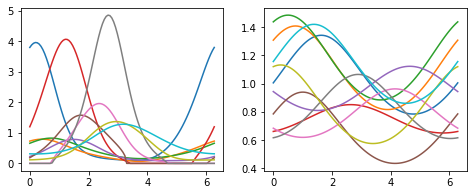

In [49]:
n = 6

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(covs, gt_lamb[:30:3, :].T)
axes[1].plot(covs, gt_nu[:30:3, :].T)

plt.show()

In [50]:
data_path = '../data/'
data_type = 'modIP{}'.format(seed)
bin_size = 1

dataset_dict = models.get_dataset(data_type, bin_size, data_path)
spk_counts = dataset_dict["spiketrains"]
print(spk_counts.max())

28.0


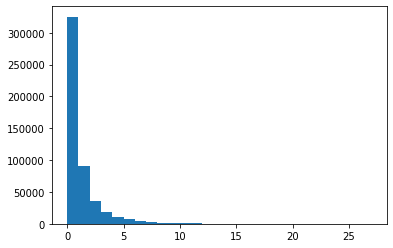

In [51]:
plt.hist(spk_counts.reshape(-1), bins=np.arange(spk_counts.max()))
plt.show()

In [52]:
data_path = '../data/'
data_type = 'hCMP{}'.format(seed)
bin_size = 1

dataset_dict = models.get_dataset(data_type, bin_size, data_path)
spk_counts = dataset_dict["spiketrains"]
print(spk_counts.max())

18.0


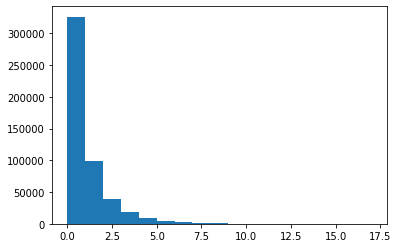

In [53]:
plt.hist(spk_counts.reshape(-1), bins=np.arange(spk_counts.max()))
plt.show()